# Machine Learning Lab Sheet - Model Performance Evaluation
This notebook evaluates various classification models on the Adult Income dataset to identify the best performing model based on precision, recall, and accuracy.

In [54]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
import numpy as np

In [55]:
#url = "https://archive.ics.uci.edu/ml/machine-learningdatabases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num",
"marital-status",
 "occupation", "relationship", "race", "sex", "capital-gain",
"capital-loss",
 "hours-per-week", "native-country", "income"]
data = pd.read_csv("adult.data", names=columns, na_values='?')

In [56]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [58]:
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data),
columns=columns)


In [59]:
data_imputed

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [60]:
label_encoders = {} 
for column in data_imputed.select_dtypes(include='object').columns: 
    le = LabelEncoder() 
    data_imputed[column] = le.fit_transform(data_imputed[column]) 
    label_encoders[column] = le

In [61]:
data_imputed.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


In [62]:
scaler = StandardScaler() 
cols_to_norm = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
data_imputed[cols_to_norm] = StandardScaler().fit_transform(data_imputed[cols_to_norm])
data_imputed

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.030778,7,-1.294106,9,1.134739,4,1,1,4,1,0.793942,-0.204177,-0.031122,39,0
1,0.837509,6,-1.251950,9,1.134739,2,4,0,4,1,-0.279023,-0.204177,-2.254475,39,0
2,-0.042561,4,0.593020,11,-0.420060,0,6,1,4,1,-0.279023,-0.204177,-0.031122,39,0
3,1.057526,4,0.799670,1,-1.197459,2,6,0,2,1,-0.279023,-0.204177,-0.031122,39,0
4,-0.775952,4,1.464090,9,1.134739,2,10,5,2,0,-0.279023,-0.204177,-0.031122,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849291,4,0.996731,7,0.746039,2,13,5,4,0,-0.279023,-0.204177,-0.195815,39,0
32557,0.104118,4,-0.399891,11,-0.420060,2,7,0,4,1,-0.279023,-0.204177,-0.031122,39,1
32558,1.424221,4,-0.432459,11,-0.420060,6,1,4,4,0,-0.279023,-0.204177,-0.031122,39,0
32559,-1.215986,4,0.393810,11,-0.420060,4,1,3,4,1,-0.279023,-0.204177,-1.678050,39,0


In [63]:
X = data_imputed.drop('income', axis=1) 
y = data_imputed['income'] 

In [64]:
ean = np.mean(data_imputed) 
variance = np.var(data_imputed) 
std_dev = np.std(data_imputed)

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


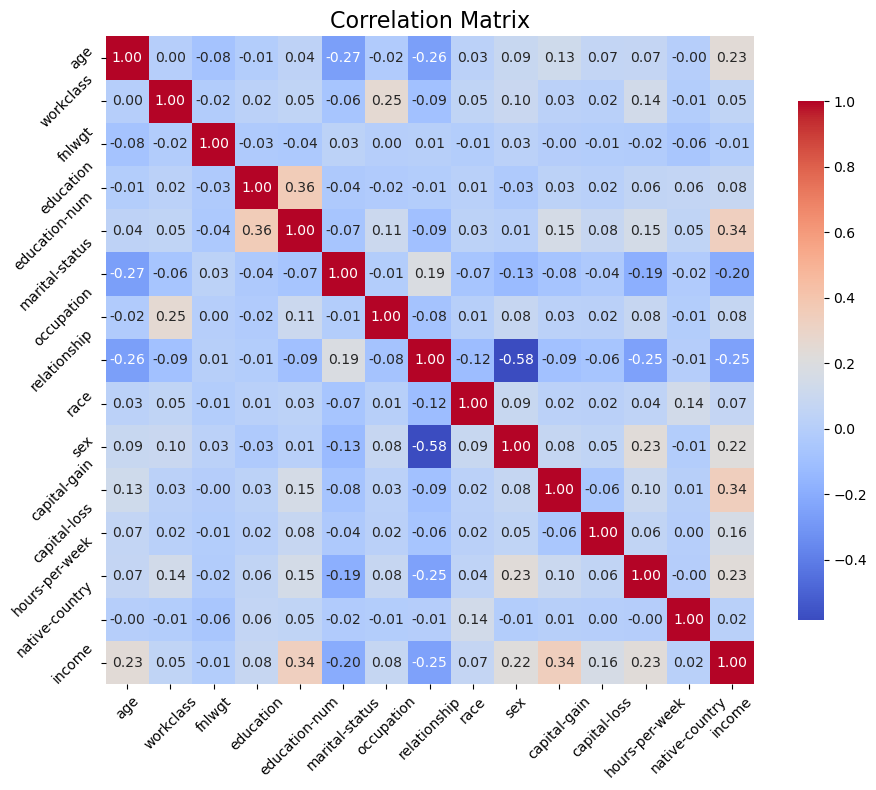

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
correlation_matrix = data_imputed.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set titles and labels
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from  sklearn.linear_model import LogisticRegression
# Logistic Regression model with custom hyperparameters 
model = LogisticRegression( 
    penalty='l2',        # L2 regularization 
    C=0.1,               # Stronger regularization (small C) 
    solver='saga',       # Solver supporting elasticnet 
    max_iter=500,        # Increase max iterations 
    tol=1e-5,            # Smaller tolerance for convergence 
    class_weight='balanced',  # Handle class imbalance 
    multi_class='multinomial' # Multinomial logistic regression 
) 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
from sklearn.metrics import accuracy_score 
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}") 


Accuracy: 0.7671


In [68]:
from sklearn.neural_network import MLPClassifier 
# Define the MLP Classifier with hyperparameters 
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),   # Two hidden layers with 100 and 50 neurons 
    activation='relu',              # Activation function 
    solver='adam',                  # Optimizer 
    alpha=0.0001,                   # L2 regularization 
    learning_rate='adaptive',       # Adaptive learning rate 
    learning_rate_init=0.001,       # Initial learning rate 
    max_iter=500,                   # Increased number of iterations 
    early_stopping=True,            # Use early stopping 
    validation_fraction=0.1         # 10% validation split 
) 
mlp.fit(X_train, y_train) 
y_pred = mlp.predict(X_test) 
# Print accuracy 
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.8517


In [69]:
from sklearn.naive_bayes import GaussianNB 
# Initialize the model with custom var_smoothing 
gnb_model = GaussianNB(var_smoothing=1e-8)  # Slightly less smoothing 
gnb_model.fit(X_train, y_train) 
y_pred = gnb_model.predict(X_test) 
from sklearn.metrics import accuracy_score 
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}") 

Accuracy: 0.8219


In [70]:
from sklearn.tree import DecisionTreeClassifier 
# Initialize the Decision Tree model with custom hyperparameters 
tree_model = DecisionTreeClassifier( 
    max_depth=5,             # Limit depth of tree 
    min_samples_split=10     # Require at least 10 samples to split 
) 
# Train the model 
tree_model.fit(X_train, y_train) 
# Make predictions 
y_pred = tree_model.predict(X_test) 
from sklearn.metrics import accuracy_score 
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}") 

Accuracy: 0.8552


In [71]:
from sklearn.svm import LinearSVC 
# Initialize the SVM model with custom hyperparameters 
svm_model = LinearSVC( 
C=1.0,                  
# Regularization parameter 
) 
# Train the model 
svm_model.fit(X_train, y_train) 
# Make predictions 
y_pred = svm_model.predict(X_test) 
from sklearn.metrics import accuracy_score 
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.8234


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [72]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 
# Initialize the kernel SVM model with custom hyperparameters 
svmk_model = SVC( 
    C=1.0,               # Regularization parameter 
    kernel='rbf',        # Kernel type: 'linear', 'poly', 'rbf', 'sigmoid' 
    gamma='scale'        # Kernel coefficient ('scale' is the default for RBF) 
) 
svmk_model.fit(X_train, y_train) 
y_pred = svmk_model.predict(X_test) 
# Evaluate the accuracy 
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}") 

Accuracy: 0.8115


In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score 
# Initialize the LDA model with default hyperparameters 
lda_model = LinearDiscriminantAnalysis() 
lda_model.fit(X_train, y_train) 
y_pred = lda_model.predict(X_test) 
# Evaluate the accuracy 
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}") 

Accuracy: 0.8251


In [74]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.metrics import accuracy_score 
# Initialize the QDA model with default hyperparameters 
qda_model = QuadraticDiscriminantAnalysis() 
# Train the model 
qda_model.fit(X_train, y_train) 
# Make predictions 
y_pred = qda_model.predict(X_test) 
# Evaluate the accuracy 
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}") 


Accuracy: 0.8253


In [75]:
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV 
# Feature scaling 
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
# Hyperparameter tuning using GridSearchCV 
param_grid = { 
    'C': [0.01, 0.1, 0.5, 1.0, 2.0], 
    'max_iter': [500, 1000, 2000], 
    'tol': [1e-4, 1e-3, 1e-2] 
} 
# Grid search 
grid_search = GridSearchCV(PassiveAggressiveClassifier(random_state=42), 
param_grid, cv=5, scoring='accuracy') 
grid_search.fit(X_train_scaled, y_train) 
 
# Get the best model 
best_pac_model = grid_search.best_estimator_ 
 
# Make predictions 
y_pred = best_pac_model.predict(X_test_scaled) 
 
# Evaluate the accuracy 
print(f"Best Accuracy: {accuracy_score(y_test, y_pred):.4f}") 
print(f"Best Parameters: {grid_search.best_params_}")

Best Accuracy: 0.8260
Best Parameters: {'C': 0.01, 'max_iter': 500, 'tol': 0.001}


In [76]:
from sklearn.linear_model import RidgeClassifier
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
ridge_model = RidgeClassifier( 
    alpha=1.0,           # Regularization strength (default is 1.0) 
    tol=1e-3,            # Tolerance for stopping criteria 
    random_state=42      # Random state for reproducibility 
) 
# Train the model 
ridge_model.fit(X_train_scaled, y_train) 
# Make predictions 
y_pred = ridge_model.predict(X_test_scaled) 
# Evaluate the accuracy 
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}") 

Accuracy: 0.8204


In [77]:
model_name_list = ['Logistic Regression','Multi-Layer Perceptron','Naive-Bayes Classifier','Decision Trees','Linear Support Vector Machine','Kernel Support Vector Machine','Linear Discriminant Analysis','Quadratic Discriminant Analysis','Passive Aggressive Classifier','Ridge Classifier']
models_list = [model,mlp,gnb_model,tree_model,svm_model,svmk_model,lda_model,qda_model,best_pac_model,ridge_model]

In [79]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

metrics_list = []

for model_name, model in zip(model_name_list, models_list):
    y_pred = model.predict(X_test)
    
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    metrics_list.append({
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'F1 Score': f1
    })

metrics_df = pd.DataFrame(metrics_list)

metrics_df

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PassiveAggressiveClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RidgeClassifier was fitted without feature names
  warnings.warn(


,Model,Precision,Recall,Accuracy,F1 Score
0,Logistic Regression,0.816392,0.767081,0.767081,0.780450
1,Multi-Layer Perceptron,0.844886,0.851681,0.851681,0.845239
2,Naive-Bayes Classifier,0.810200,0.821895,0.821895,0.810458
3,Decision Trees,0.849685,0.855213,0.855213,0.844711
4,Linear Support Vector Machine,0.815118,0.823430,0.823430,0.801318
5,Kernel Support Vector Machine,0.805765,0.811454,0.811454,0.778863
6,Linear Discriminant Analysis,0.814604,0.825119,0.825119,0.807671
7,Quadratic Discriminant Analysis,0.814066,0.825273,0.825273,0.813688
8,Passive Aggressive Classifier,0.741560,0.298173,0.298173,0.214016
9,Ridge Classifier,0.822054,0.808230,0.808230,0.762936
